# 미국, 영국, 칠레의 COVID-19 시계열 예측
안녕하세요, 새로운 프로젝트에 다시 오신 것을 환영합니다! 현재 프로젝트에서 제목이 시사하는 바와 같이, 우리는 3개국의 COVID-19 대유행에 대한 순차적 역사적 관찰에서 나온 기본적인 시간적 패턴을 철저히 분석하고 비교할 것이며, 특히 우리는 다음과 같은 3가지 주요 특징에 초점을 맞출 것이다. 새로운 사례, 새로운 죽음 그리고 예방접종을 받은 사람들의 비율.

목표를 더 자세히 설명하기 전에, 옥스포드 대학과 협력하여 세계에 영향을 미치는 이러한 큰 문제에 초점을 맞춘 수십 개의 주제에 대한 신뢰할 수 있는 데이터 저장소인 "데이터 속 우리의 세계"가 제공하는 데이터셋에 해당하기 때문에 사용된 데이터셋에 대해 설명해야 합니다. 이것이 바로 COVID-19가 발발한 이래로 몇몇 연구원들이 더 나은 결정을 내릴 수 있는 여러 지표에 대한 세계 각국의 데이터를 수집하고 있는 이유입니다. 더 놀라운 것은 이 데이터 집합이 매일 업데이트되어 모든 국가가 이를 추적할 수 있다는 사실입니다. 다음 링크에서는 전염병에 대한 흥미로운 차트와 60개 이상의 기능이 포함된 World COVID-19 데이터 세트(최신)에 대한 차트를 무료로 다운로드할 수 있습니다.

https://ourworldindata.org/covid-vaccinations

이 프로젝트의 주요 목표는 "미래"의 행동을 예측하기 위해 가능한 모든 것을 고려한 딥러닝 모델을 구축하는 것으로, 지역사회를 안전하게 지킬 책임에서 우리의 의지 또는 다음 단계를 지원할 가능성을 열어준다. 다른 모든 시계열 과제와 마찬가지로 플롯은 입력이나 "퍼레이션"이 주어진 반응을 갖는 전형적인 선형 시스템처럼 행동할 수 있기 때문에 깊게 분석하는 것을 의미한다. 분명히 이 데이터는 주식 시장, 가격, 판매, 예산, 날씨 등과 같이 우리가 다루는 데 익숙한 다른 주제로는 작동하지 않습니다. 이 특정 주제에 대한 데이터는 때때로 너무 불확실해서 심지어 가장 적절하고 강력한 통계 모델도 실패할 수 있고, 경험적 증거에 의해 더 크게 영향을 받을 수 있는 변화를 예측하는 것이 우리가 존 캠벨 박사의 경험과 말을 크게 고려함으로써 각각의 추론을 뒷받침할 것이다.RLD 전반에 걸쳐 알려진 은퇴한 간호사 교육자이자 다수의 간호 교과서의 저자인 그는 자신의 채널에 널리 조회된 유튜브 동영상을 게시했다.

말이 나왔으니 시작하겠습니다

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')
import numpy as np

- csv 파일을 읽고 처음 5개의 인스턴스를 표시합니다.

In [2]:
data=pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


- 열, 열의 유형 및 Null이 아닌 값에 포함된 개수를 살펴보겠습니다. Null이 아닌 값의 수는 일부 피쳐를 국가에서 수집할 수 없거나 사용할 수 없음을 의미합니다.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

- '위치' 열에서는 수집할 컨티티를 필터링할 수 있지만 먼저 이러한 열에 고유한 인스턴스를 인쇄하여 각 국가의 이름을 지정하는 방법을 알아보겠습니다.

In [4]:
data.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

- 위에서 일부 국가는 두문자어로 이름이 지정되고 다른 국가는 그렇지 않은 것을 확인할 수 있습니다. 특히 한 국가를 선택하면 해당 국가가 0번 환자가 처음 나타나는 날과 일치하는 많은 수의 행을 표시할 수 있습니다.

In [5]:
data[data['location']=='Chile']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
30791,CHL,South America,Chile,2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,205.0,1.3,-3.54,10.670213
30792,CHL,South America,Chile,2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30793,CHL,South America,Chile,2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30794,CHL,South America,Chile,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
30795,CHL,South America,Chile,2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31528,CHL,South America,Chile,2022-03-01,3061019.0,0.0,23584.000,42353.0,0.0,118.143,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31529,CHL,South America,Chile,2022-03-02,3098110.0,37091.0,25282.714,42411.0,58.0,120.000,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31530,CHL,South America,Chile,2022-03-03,3122802.0,24692.0,24129.571,42683.0,272.0,126.857,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN
31531,CHL,South America,Chile,2022-03-04,3147434.0,24632.0,23080.143,42809.0,126.0,127.143,...,34.2,41.5,NaN,2.11,80.18,0.851,NaN,NaN,NaN,NaN


세 나라를 심층 분석하기 전에 2020년 첫날부터 현재까지 전 세계의 유행병 행동과 관련된 몇 가지 분석을 날짜별로 분류한 모든 국가에서 수집된 수치를 합산하여 수행할 것이다.

#### 전 세계의 새로운 사례와 새로운 사망자에 대한 플롯

Text(0, 0.5, 'New cases')

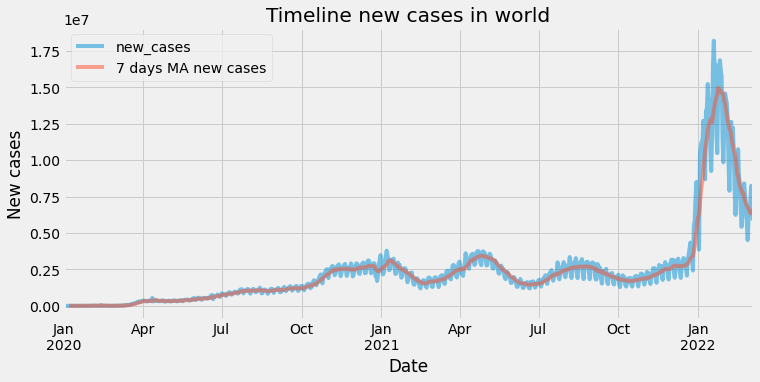

In [6]:
data2=data.copy()
data2.date=pd.to_datetime(data2['date'])
data2=data2.groupby('date').sum()
data2['7 days MA new cases']=0
data2['7 days MA new cases']=data2['new_cases'].rolling(7).mean() # rolling:이동평균계산
#창이 있는 새로운 사례의 이동 평균=10
data2['7 days MA new deaths']=0
data2['7 days MA new deaths']=data2['new_deaths'].rolling(7).mean()
#창이 있는 새로운 사망자의 이동 평균=10

data2[['new_cases','7 days MA new cases']].plot(figsize=(11,5),alpha=0.5)
plt.title('Timeline new cases in world')
plt.xlabel('Date')
plt.ylabel('New cases')

위의 도표에서 우리는 전 세계에 영향을 준 4개의 파동, 원래의 변종, 베타, 델타, 오미크론을 명확히 볼 수 있습니다. 이 현재의 변종이 지금까지 지배적인 것으로 변종 베타파에 해당하는 이전의 정점보다 4배 이상 높았는데, 이 현상은 주로 박사로써 발생하기 때문이다. 톰 프리든은 이렇게 말했다. 이는 면역력이 없는 집단에서 퍼지는 홍역만큼이나 전염성이 강하며, 잠복기가 훨씬 짧기 때문에 시간이 두 배로 늘어나거나 EL PAIS USA 저널이 첫 번째 문장에서 밝힌 바와 같이 말입니다. 오미크론은 인류에게 알려진 바이러스 중 가장 빠르게 퍼지는 바이러스이며, 역학학자 윌리엄 하나지가 다음과 같이 말했다: 오미크론은 우리가 이 정도 수준의 세부 사항으로 조사할 수 있는 바이러스 중 확실히 가장 빠르게 퍼지는 바이러스이다.

날짜별로 정렬된 모든 국가의 변형 분포가 포함된 데이터 세트가 있습니다. 이 데이터 집합은 오미크론이 다른 변형을 삭제한 방식을 볼 수 있습니다. 안타깝게도 이 데이터 집합은 독점 라이센스 하에 있으며 게시자는 이를 시각화하는 것만 허용합니다. 아래는 시간 슬라이더가 있는 해당 차트로 연결되는 링크입니다. 자세한 내용을 보시길 바랍니다.

https://ourworldindata.org/grapher/covid-variants-bar?time=2022-01-19&country=AUS~GBR~USA~BEL~ITA~FRA~ESP~DEU~BWA~ZAF~CAN

우리는 이 마지막 물결에 대한 수백 개의 출판물을 추가할 수 있지만, 이 변종을 지속적으로 추적하기 위해 주의를 기울이고 전문가로 만드는 것은 사망자의 숫자이다. 왜냐하면 처음에 우리는 그것의 낮은 심각성에 대해 이야기하고 있었지만, 지금은 그 수가 상당히 증가하고 있지만, 그것의 현재 최고점은 그것보다 훨씬 낮았기 때문이다. 아래 보이는 바와 같이 이전의 두 파동.

Text(0, 0.5, 'New deaths')

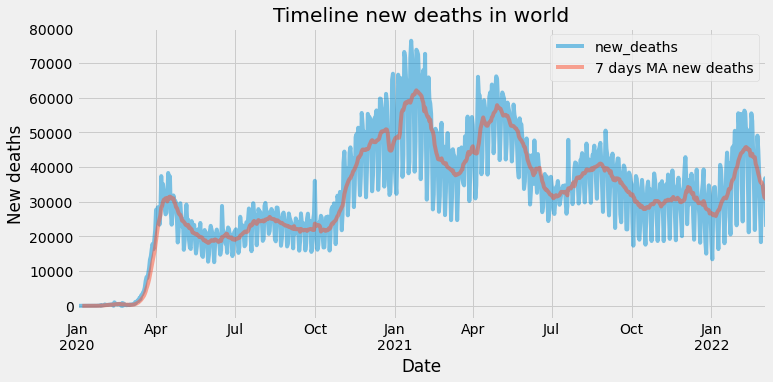

In [7]:
data2[['new_deaths','7 days MA new deaths']].plot(figsize=(11,5),alpha=0.5)
plt.title('Timeline new deaths in world')
plt.xlabel('Date')
plt.ylabel('New deaths')

현재 파동이 시작될 때 우리는 전문가들이 엄청난 양의 가설을 세울 수 있도록 만든 새로운 죽음의 곡선의 비교적 작은 증가를 보았다. 오마이크론은 이전 변종보다 덜 심각한가? 세계 보건 당국이 이 모든 실험들이 아직 진행 중이기 때문에 감염을 예방하기 위한 권고안을 계속 따르도록 지지할 수 있는 출판물들이 있다. 그러나 다음 부분은 1월 14일 BBC 뉴스의 한 출판물에서 발췌한 것이다.

영국 보건청은 최근 위험도 평가에서 오미크론이 대부분의 성인들에게 비교적 온화하다는 자신감이 생겼다고 밝혔다. 이것은 백신이 많은 사람들을 감염시키고 있는 이 최신 COVID 변형에 의해 야기되는 심각한 질병에 대한 높은 보호 기능을 제공하는 것이 주된 이유이다.

분명히 백신의 주요 목적은 그것이다, 하지만 우리 모두는 백신에 접근하기 위해 여전히 문제를 겪고 있는 몇몇 국가들에 대해 알고 있거나 적어도 생각을 가지고 있다. 이것이 우리가 이 프로젝트에서 COVID-19 싸움에서 선구자인 세 개의 강력한 국가들을 선택한 이유이다.eir는 이 질병을 보다 세심하게 다루기 위해 "저개발국"들이 따라야 할 본보기를 전략한다.

## 영국, 미국, 칠레의 COVID-19 분석

데이터 세트에서 세 국가에 대해 다음 기능을 수집합니다.

- 날짜.
- 합계_건수
- 새로운 사례
- 토탈_토탈
- 신상_신상
- people_contracted_per 100
- people_fully_contracted_per 100
- 신상품의
- new_cases_per_million

일단 우리가 그것들을 선택하고 나면, 우리는 new_case, new_death, new_death_per_million, new_case_per_million과 같은 현재의 것들을 기반으로 새로운 특징들을 만들어야 한다. 왜냐하면 이것들은 계산, 비작업일수, 대규모 테스트 등에서 전형적인 실수들로 인해 갑자기 피크가 발생하기 때문이다. 마지막으로 세 개의 흥미로운 플롯이 디스플레이 될 것이다.예. 그럼에도 불구하고 데이터 프레임과 국가를 묻고 처리한 데이터 프레임을 반환하면서 분석을 더 빠르게 하는 기능을 구축하면 훨씬 좋을 것이다.

칠레 데이터의 실수로 인해 수동으로 변경해야 하며, 사고가 발생한 날짜는 2021년 10월 7일이며, 여기서 총 사망자 수는 37533명으로 증가했다. 신뢰성이 필수이기 때문에 다음 연결 고리는 보건 당국의 공식 보고서이다.

https://www.minsal.cl/reporte-covid-19-se-registran-981-nuevos-casos-y-una-positividad-de-151/

영국의 데이터에서도 비슷한 일이 일어났는데, 이 데이터에서는 새로운 사례와 새로운 사망 값이 2022년 1월 31일과 2월 1일로 잘못 기재되어 있었다. 두 날짜의 실제 값을 찾기 위해 깊이 연구하여 ourworldindata.com과 영국 정부 공식 웹페이지 간에 불일치를 발견하였습니다. 저는 당신이 가서 값을 비교하기를 절대적으로 권장합니다. 물론 우리는 정부가 관리하는 가치를 고려해야 합니다, 하지만 ourworldindata.com에 의해 주어진 값은 구글에서 사용됩니다. 그리고 전세계 기관들이 이 전염병을 추적하고 있다. 다음 링크는 이날 보건당국의 공식 보고서다.

https://coronavirus.data.gov.uk/details/deaths

중요: 이전 데이터 집합에서 우리는 2021-04-09와 2021-05-18 날짜에 대해 새로운 사례가 절대적으로 부정확한 음수 값임을 보았다. 현재 데이터 집합 ourworldindata.com에서 이러한 값을 변경하였다. 공식 페이지에서 볼 수 있다. 그러나 나는 영국 정부에 의해 발표된 값을 사용하기로 결정했다.

In [12]:
def create_and_plot_df(df,country):
    # 7개의 핵심 칼럼 추출
    df=df[df['location']==country].copy()
    df=df[['date','total_cases','new_cases','total_deaths','new_deaths',
          'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
          'new_deaths_per_million','new_cases_per_million']].copy()
    
    # datetime형식으로 변환
    df.date=pd.to_datetime(df['date'])
    
    # 칠레 데이터 오류 고치기
    if country=='Chile':
        df.loc[df['date']=='2021-10-07','total_deaths']=37533
        df.loc[df['date']=='2021-10-07','new_deaths'] = 21
        df.loc[df['date']=='2021-10-08','new_deaths'] = 9
        df.loc[df['date']=='2021-10-07','new_deaths_per_million'] = 1.092
        df.loc[df['date']=='2021-10-08','new_deaths_per_million'] = 0.468
    else:
        pass
    
    # 영국 데이터 오류 고치기
    if country=='United Kingdom':
        df.loc[df['date']=='2022-01-31','new_cases'] = 92368
        df.loc[df['date']=='2022-02-01','new_deaths'] = 219
        df.loc[df['date']=='2022-01-31','new_cases_per_million'] = 1354
        df.loc[df['date']=='2022-02-01','new_deaths_per_million'] = 3.211
        df.loc[df['date']=='2021-04-09','new_cases'] = 3150
        df.loc[df['date']=='2021-04-09','new_cases_per_million'] = 46
        df.loc[df['date']=='2021-05-18','new_cases'] = 2412
        df.loc[df['date']=='2021-05-18','new_cases_per_million'] = 35
    else:
        pass
    #new_case 및 new_death의 경우 window=7로 날짜를 Index로 설정하고 이동 평균을 계산합니다.
    df.set_index('date', inplace=True)
    df['7 days MA new cases'] = 0
    df['7 days MA new cases'] = df['new_cases'].rolling(7).mean()
    df['7 days MA new deaths'] = 0
    df['7 days MA new deaths'] = df['new_deaths'].rolling(7).mean()
    df['7 days MA new cases per million'] = 0
    df['7 days MA new cases per million'] = df['new_cases_per_million'].rolling(7).mean()
    df['7 days MA new deaths per million'] = 0
    df['7 days MA new deaths per million'] = df['new_deaths_per_million'].rolling(7).mean()
    
    # 새로운 사례, 새로운 사망자, 예방접종자 그림 그리기
    df[['new_cases','7 days MA new cases']].plot(figsize=(15,5),alpha=0.5)
    plt.title(f'Timeline new cases in {country}')
    
    df[['new_deaths','7 days MA new deaths']].plot(figsize=(15,5),alpha=0.5)
    if country=='Chile':
        plt.ylim([0,400])
    else:
        pass
    plt.title(f'Timeline new deaths in {country}')
    
    df[['people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']].plot(figsize=(15,5),alpha=0.5)
    plt.ylim([0,100])
    plt.fill_between(df.index,df.people_vaccinated_per_hundred)
    plt.fill_between(df.index,df.people_fully_vaccinated_per_hundred)
    plt.title(f'Timeline percentage of people vaccinated in {country}')
    
    return df

각 국가를 분석하기 위해 방금 구축한 함수를 사용할 시간:

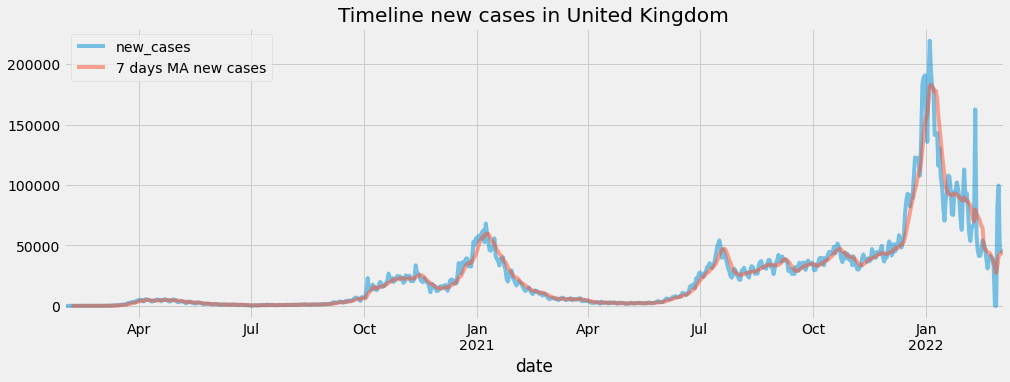

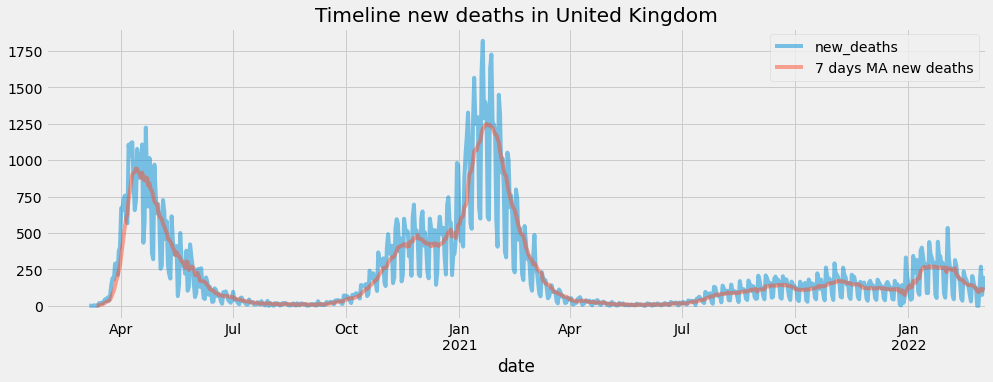

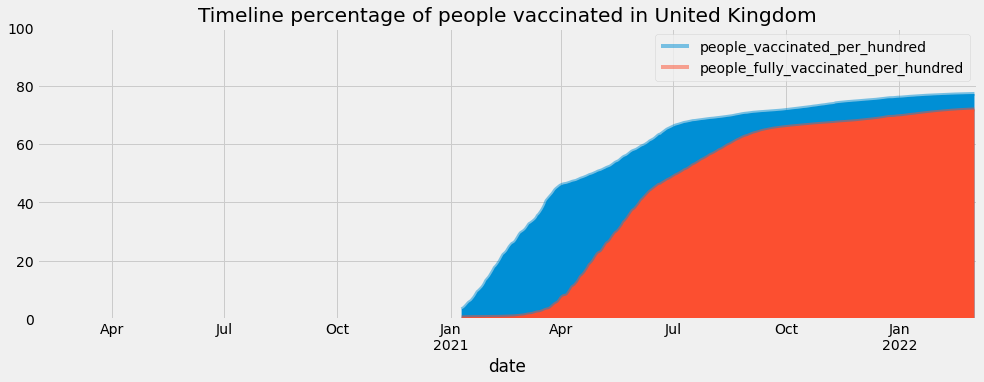

In [13]:
df_uk=create_and_plot_df(data, 'United Kingdom')

첫 번째 차트에서 가장 인상적인 특징은 새로운 사망 곡선이 정착된 것처럼 보이는 경우의 수가 빠르게 부패하고 있으며, 현재까지도 덜 심각한 파도에 해당하며 이 사실의 가장 큰 가설은 백신이다. 이를 뒷받침하기 위해 2021년 1월경부터 백신 접종절차가 시작됐고, 백신 접종을 받은 사람들이 늘어나면서 신규 환자 수와 신규 사망자 수가 급감했는데, 특히 4월에는 전례 없이 낮은 수치를 보였고, 1회 접종자 수도 50%를 조금 밑돌았다. 이것이 오미크론에도 불구하고 사망자 수가 급증하지 않은 이유이며, 이는 오미크론 경처럼 지금까지 기록된 가장 전염성이 강한 질병이 되었다. 데이비드 스피거홀터는 이렇게 말했다. 아직도 중환자실 인공호흡과 사망이 심각하게 증가할 조짐은 보이지 않고 있고 지금쯤이면 그렇게 될 것으로 예상되고 있습니다.

라훌 샤르마 박사: 입원 건수가 증가하고 있지만, 이전의 파도와는 병세가 심각해 보입니다. 중환자실에 환자를 많이 보내지 않아요. 사실 양성 판정을 받은 응급실에 오는 대부분의 환자들이 실제로 퇴원하고 있어요. 이전 변종처럼 환자가 입원으로 전환되지 않고 있습니다.

존 캠벨 박사는 오미크롬이 처음 보고된 지역은 남아프리카 공화국으로 12월 초였으며 흥미롭게도 영국과 마찬가지로 지속적으로 감소하고 있다고 말했다. 영국의 새로운 사례의 패턴은 3~4주 전의 남아프리카의 패턴을 밀접하게 반영하고 있다. 남아프리카 곡선에서는 이전의 세 파동들에 비해 매우 빠르게 떨어졌음을 알 수 있습니다.

영국과 미국의 패턴에서 눈에 띄는 것은 곡선의 거대한 파문인데, 우리는 그 숫자가 매우 빠르게 오르내리는 것을 볼 수 있는데, 이는 적어도 3개월 동안 14번의 파동이 일어나는데, 이는 주 수와 거의 일치하기 때문에 적어도 의아하다. 가장 걱정되는 곡선은 새로운 사망자의 숫자입니다. 왜냐하면 그러한 숫자가 매주 너무 폭력적으로 오르내리는 것이 이상하기 때문에, 저는 잘못된 계산 방법을 의심하거나 확실히 불공평합니다, 이것은 단지 초기 가설일 뿐입니다.

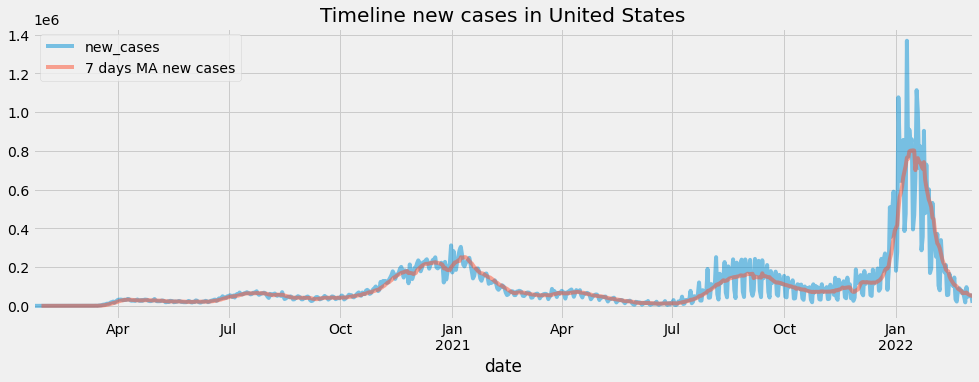

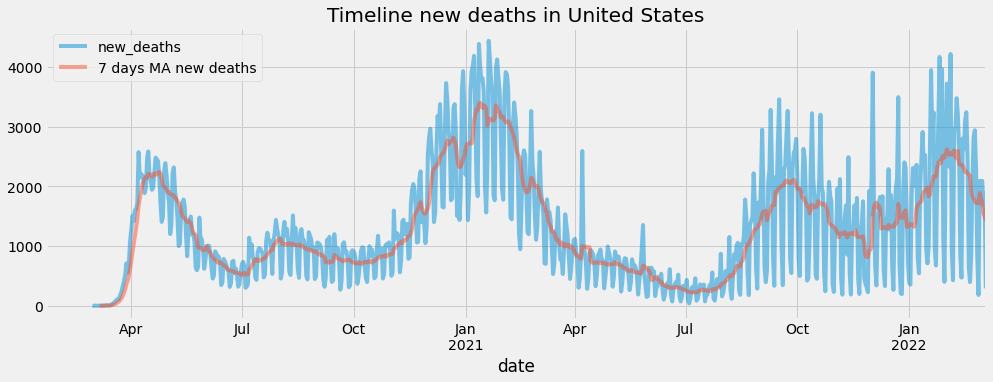

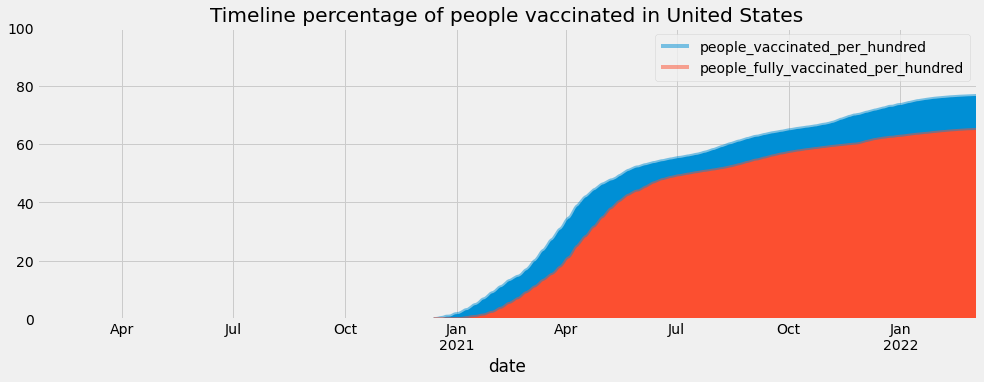

In [14]:
df_us=create_and_plot_df(data,'United States')

첫 번째 차트를 보면 오미크론 변종에 대한 영국식 패턴을 따르고 있으며, 실제로 발생하는 날짜의 변화가 있어 역설적이게도 영국은 일종의 미래 행태가 되었다. 지난 1월 10일 미국의 신규 발생 건수는 130만 건으로 이전 정점 대비 5배 가까이 증가했으며, 델타 정점을 넘어서도 상당히 증가했기 때문에 영국과 큰 차이를 보이고 있다. 다음은 John Campbell 박사의 분석에서 발췌한 것이다. 미국은 정점을 넘어서고 있을 수 있으며 1월 말까지 경기 곡선이 진정되어야 한다. 미국에서 새로운 사례가 급증하는 이유는 부분적으로 낮은 백신 접종률, 동시 발병률, 델타 잔류 순환, 델타 감염 후가 원인일 수 있다.

미국의 상황은 1월 말 입원자 수가 2020년 12월/2021년 1월 전후로 기록되었기 때문에 걱정스러웠다. 미국의 상황만 보아도 백신 접종 건수와 사망률의 증가는 현재까지 76%의 사람들만이 첫 접종을 받았고 64%는 영국과 비교해 상당히 낮은 2회 접종을 받았기 때문에 백신의 효율성은 의심할 여지가 없다고 생각할 수 있다.근데 쇼핑몰을 인원수로 환산하면 엄청 커요.

존 캠벨 박사가 1월 중순(오미크론 정점) 미국에서 강조했던 몇 가지 더 많은 언급을 보여드리겠습니다.

비넷 아로라(병원 의사): 미국에는 만성질환자가 많은데, 그 모든 사람들이 지금 동시에 병원에 오고 있는 것 같습니다.

크레이그 스펜서(응급 의사): 의료 시스템이 위기에 처했고 붕괴 직전에 있다.

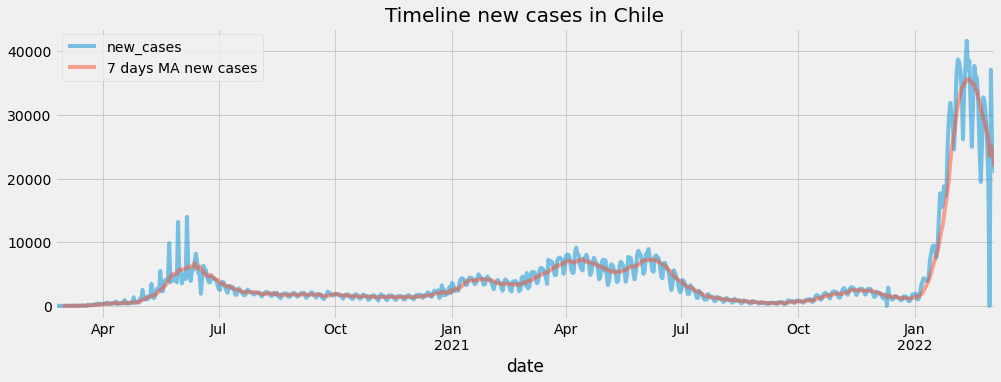

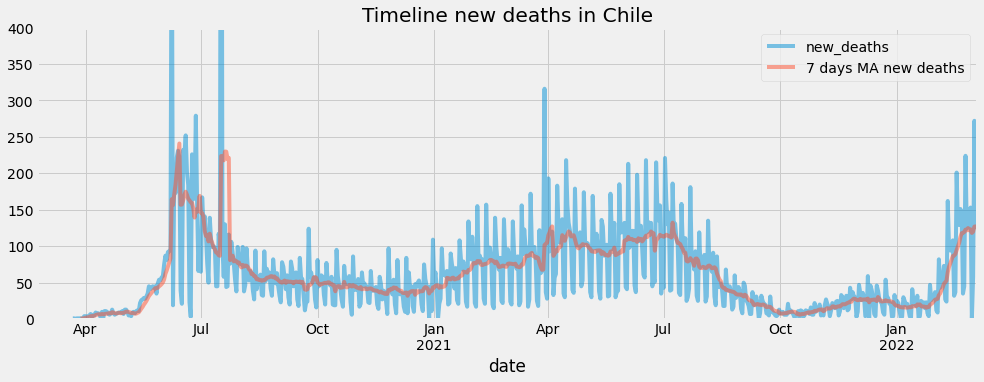

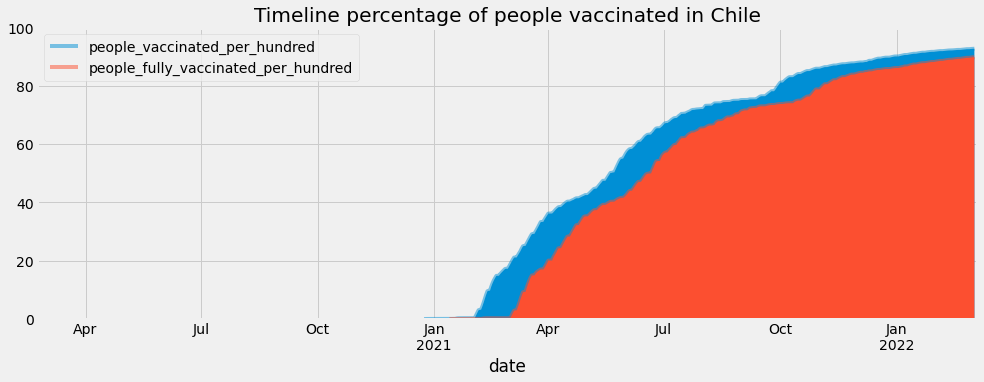

In [16]:
df_chile=create_and_plot_df(data,'Chile')

In [17]:
df_chile

,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_deaths_per_million,new_cases_per_million,7 days MA new cases,7 days MA new deaths,7 days MA new cases per million,7 days MA new deaths per million
date,,,,,,,,,,,,
2020-02-23,2.0,2.0,NaN,NaN,NaN,NaN,NaN,0.104,NaN,NaN,NaN,NaN
2020-02-24,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
2020-02-27,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,3061019.0,0.0,42353.0,0.0,92.66,89.76,0.000,0.000,23584.000000,118.142857,1227.542857,6.149286
2022-03-02,3098110.0,37091.0,42411.0,58.0,92.70,89.80,3.019,1930.580,25282.714286,120.000000,1315.960714,6.246000
2022-03-03,3122802.0,24692.0,42683.0,272.0,92.71,89.83,14.158,1285.214,24129.571429,126.857143,1255.939857,6.603000


내가 사는 나라 칠레는 한때 예방접종률이 세계에서 가장 높고 백신을 거부하지 않아 92%가 1회 접종하고 89%가 2회 접종했다. 현재의 유행 초기에 새로운 사망자의 수는 전 세계 보건 당국이 칠레를 추적하고 이러한 행동을 백신 접종 과정의 성공과 강하게 연관시키는 다른 국가들에 비해 현저히 낮았다. 하지만 최근 들어 새로운 환자 수의 곡선이 마침내 정점에 달했고 우리가 예측한 대로 감소했음에도 불구하고 특히 최근 몇 주간 신규 사망자 수가 상당히 증가하고 있기 때문에 완전히 달라졌다. 영국과 미국과 비교했을 때, 새로운 사례 곡선은 비슷한 행동을 보였고, 나중에 우리는 그들을 훨씬 더 잘 비교하기 위해 백만 명 당 그들을 볼 것이다, 그러나 의심의 여지 없이 우리는 새로운 사망 곡선을 유지하는데 백신의 효과를 지지하는 가설에 대해 이야기하고 있었다.그렇지 않기 때문에 반대 사실을 뒷받침하는 가설이 시작되었다.

앞으로 며칠 안에 우리는 새로운 사례의 곡선이 영국보다 훨씬 더 빠르게 급감할 것이라고 예상할 수 있다. 그럼에도 불구하고, 이 폭염 기간 동안 칠레는 여름 시즌 중이었고, 상당수의 사람들이 휴가 중이었고, 보건 당국은 여행이나 휴가를 가지기 위해 사람들에게 검사를 받고 부정적인 결과를 제출하도록 의무화했고, 이것은 COVID 검사 기관을 압도하게 만들었다. 전례 없이 많은 사람들이 검사를 받기를 원했는데, 이는 분명히 보고된 새로운 사례의 수가 상당히 증가했음을 의미하며, 요즘 사람들은 감염을 예방하기 위해 항상 모든 권고를 따르지 않고 덜 제한적인 조치를 취하기 위해 다시 시작하고 있다.

#### 백만 명당 사례와 백만 명당 사망자 수의 세 나라 비교

각 국가의 두 가지 특징을 포함하는 새로운 데이터 프레임을 만들고 다음과 같이 날짜별로 인덱싱합니다

In [18]:
df3_countries=pd.DataFrame()
df3_countries['New cases per million uk']=df_uk['7 days MA new cases per million']
df3_countries['New cases per million us'] = df_us['7 days MA new cases per million']
df3_countries['New cases per million chile'] = df_chile['7 days MA new cases per million']
df3_countries['New deaths per million uk'] = df_uk['7 days MA new deaths per million']
df3_countries['New deaths per million us'] = df_us['7 days MA new deaths per million']
df3_countries['New deaths per million chile'] = df_chile['7 days MA new deaths per million']
df3_countries['date']=df_uk.index
df3_countries.set_index('date',inplace=True)

df3_countries.head()

,New cases per million uk,New cases per million us,New cases per million chile,New deaths per million uk,New deaths per million us,New deaths per million chile
date,,,,,,
2020-01-31,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-01,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-02,NaN,0.001286,NaN,NaN,NaN,NaN
2020-02-03,NaN,0.002571,NaN,NaN,NaN,NaN
2020-02-04,NaN,0.002571,NaN,NaN,NaN,NaN


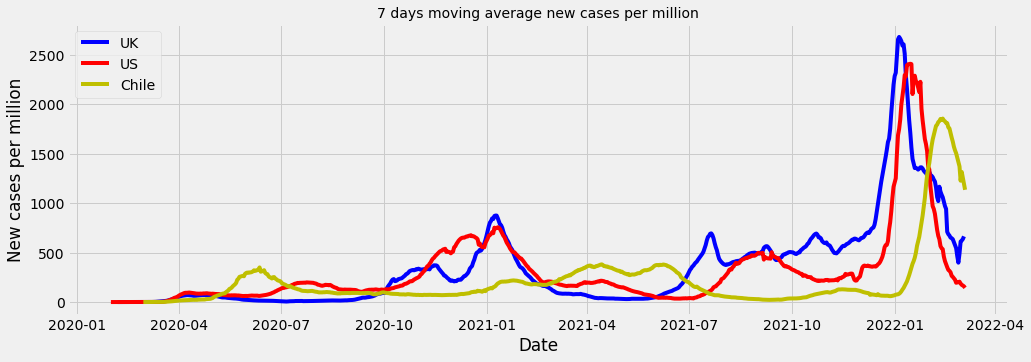

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df3_countries.index,df3_countries['New cases per million uk'],'-b',label='UK')
plt.plot(df3_countries.index, df3_countries['New cases per million us'], "-r", label="US")
plt.plot(df3_countries.index, df3_countries['New cases per million chile'], "-y", label="Chile")
plt.legend(loc='upper left')
plt.title('7 days moving average new cases per million',fontsize=14)
plt.ylabel('New cases per million')
plt.xlabel('Date')
plt.show()

위의 도표에서 우리는 세 곡선의 패턴이 조금 비슷하지만, 우리가 말한 대로 시간의 이동을 통해 칠레는 영국의 곡선을 따라 증가하고 있으며, 계절에 따라 가장 큰 영향을 미치는 구간은 2021년 7월 이후인데, 영국과 미국이 칠레의 사례를 증가시킨 반면, 칠레는 오미크로까지 낮은 수준을 유지했기 때문이다.n 스프레드.

이러한 곡선의 의미를 정량화하는 한 가지 흥미로운 방법은 곡선 아래의 영역이며, 이는 전체 전염병 시대의 백만 명당 사례 수, 즉 누적되거나 합산된 백만 명당 사례 수에 해당한다.

In [21]:
print('AUC New cases per million in the UK : ',df3_countries['New cases per million uk'].sum())
print('AUC New cases per million in the US : ',df3_countries['New cases per million us'].sum())
print('AUC New cases per million in Chile : ',df3_countries['New cases per million chile'].sum())

AUC New cases per million in the UK :  267811.3625714286
AUC New cases per million in the US :  237700.90657142858
AUC New cases per million in Chile :  161355.2457142857


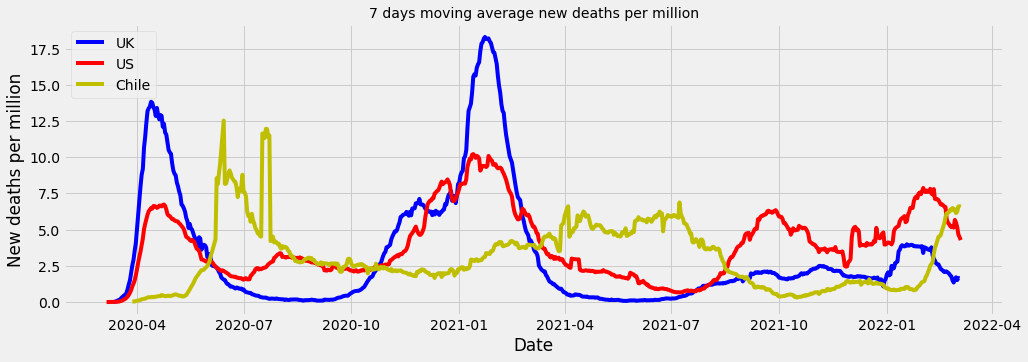

In [22]:
plt.figure(figsize=(15,5))
plt.plot(df3_countries.index, df3_countries['New deaths per million uk'], "-b", label="UK")
plt.plot(df3_countries.index, df3_countries['New deaths per million us'], "-r", label="US")
plt.plot(df3_countries.index, df3_countries['New deaths per million chile'], "-y", label="Chile")
plt.legend(loc='upper left')
plt.title('7 days moving average new deaths per million',fontsize=14)
plt.ylabel('New deaths per million')
plt.xlabel('Date')
plt.show()

In [23]:
print('AUC New deaths per million in the UK: ', df3_countries['New deaths per million uk'].sum())
print('AUC New deaths per million in the US: ', df3_countries['New deaths per million us'].sum())
print('AUC New deaths per million in Chile: ', df3_countries['New deaths per million chile'].sum())

AUC New deaths per million in the UK:  2357.771285714286
AUC New deaths per million in the US:  2866.079142857143
AUC New deaths per million in Chile:  2213.932142857142


우리는 이 차트의 곡선이 이전과 비슷하다고 말할 수 없다. 왜냐하면 특정 기간에 칠레는 시간의 이동 패턴에 따라 두 곡선을 모두 능가하기 때문이다. 2021년 8월 이후로 3번째 파동의 피크 동안 곡선의 위치가 칠레가 가장 낮고 미국이 가장 높은 것으로 바뀌는 변곡점이 있다. 특히 지난 4주 동안 오미크론 파동이 치솟았고 오늘날 칠레 곡선이 영국을 두 배로 심지어 능가했다. 이것은 백신이 사망자의 수를 멈추는 작업에 효율적이지 않다는 것을 보증하기 위해 안티 백신 그룹에 의해 사용되고 있기 때문에 칠레를 주목받게 했다.세계에서 백신 접종률이 4번째로 높은 국가라는 점을 고려할 때 대규모 의혹으로 이어질 수도 있다.

오미크론 파동이 시작되면서 사망자의 수가 감소했고 이는 분명히 백신 접종과 매우 관련이 있었으며, 이는 새로운 사례나 새로운 사망에서 또 다른 파동을 막기 위해 더 많은 양을 투여해야 한다는 가설을 촉발시켰다. 예방접종(부스트)의 반복적인 사용은 실제로 사구 반응의 품질을 저하시킬 것이다. 부스터는 한 번, 혹은 두 번 할 수 있지만, 우리가 끊임없이 반복되어야 한다고 생각할 수 있는 것은 아니다.

동시에 여러 전문의들은 우리가 새로운 covid 시대로 접어들 것이라고 생각합니다. 오마이크론은 적어도 몇 시즌 동안은 풍토병이 될 것입니다. 일반적인 감기, 인플루엔자, HIV, 홍역, 말라리아, 결핵은 현재 풍토병으로 알려져 있다.

풍토병은 심각하지 않은 것을 의미하지 않고, 항상 존재하며 가끔 나타납니다. 엘리노어 라일리 교수는 이렇게 말합니다. 오미크론이 끝나고 움직이면 영국 내 면역력은 적어도 당분간은 높을 것이다.

이 의심스럽고 불확실한 맥락은 심각한 상태이며 당국은 인구를 안전하게 유지하고 경제를 깨우고 주요 목표를 달성하기 위해 가능한 모든 도구, 조언, 증거 및 경험을 사용해야 한다. 여기 데이터 사이언티스트인 우리는 이러한 의구심을 지원하고 해결하기 위해 복잡한 머신러닝 모델을 다룰 수 있는 전문가라는 큰 주인공이 있습니다.

다음 이정표는 분석에서 고려된 각 지표 또는 특징에 대한 미래 가치를 예측할 수 있는 모델을 구축하는 것과 일치한다. 그러한 예측은 우리가 더 나아갈수록 증가하는 불확실성 수준을 가지고 있다. 그러나 나는 다음과 같은 분석을 위해 매우 흥미로운 예측이 있는 모델을 개발했다.

## 모델링 및 예측
이 모델에는 100세기 동안 Adam optimizer로 훈련된 두 개의 SimpleRNN 레이어와 세 개의 밀도 레이어가 포함되어 있다. 이 모델에 대해 자세히 설명하고 다른/다른 아키텍처 대신 이 모델을 선택한 이유를 설명하는 다음 노트를 참조하시기 바랍니다.

https://www.kaggle.com/georgesaavedra/time-series-forecasting

이 프로젝트에서는 "새로운 사례 수의 이동 평균"에 초점을 맞출 것이지만, 모델의 높은 신뢰도와 실제 및 예측 값의 일치를 고려할 때 다른 특징을 예측하기 위해 취한 프로세스를 조정할 수 있다는 것을 나중에 알게 될 것입니다.

In [25]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_squared_log_error
from keras.layers import SimpleRNN
import statistics
from tensorflow.keras.optimizers import Adam

이 과정을 우리가 분석하고자 하는 각 국가에 훨씬 더 쉽고 적응할 수 있도록 하기 위해 우리는 국가의 이름과 데이터 프레임을 받아 모델을 구축하는 기능을 만들 것이다. 아래의 셀에는 고려된 모든 단계와 그에 대한 간단한 설명이 있다.

- RNN : 과거의 데이터를 통해 미래 예측
- 예를 들면 메모리를 가지고 있어 최근 50일 간의 주식 가격 데이터를 바탕으로 내일 주식 가격이 얼마가 될 것인가를 예측

In [34]:
def build_model(country_data,name_country):
    #국가에 따라 6행 또는 7행 뒤에 해당하는 열과 행 선택:
    new_df=country_data['7 days MA new cases']
    if name_country == 'USA':
        new_df=new_df[7:].copy()
    else:
        new_df=new_df[6:].copy()
        
    # RNN 훈련 모델을 80%로 정의
    window=10
    train_len = math.ceil(len(new_df)*0.8)
    train_data = new_df[0:train_len]
    X_train=[]
    Y_train=[]
    for i in range(window, len(train_data)):
        X_train.append(train_data[i-window:i])
        Y_train.append(train_data[i])
        
    X_train, Y_train= np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    # 20% 검증 데이터 정의
    test_data=new_df[train_len-window:]
    X_val=[]
    Y_val=[]
    for i in range(window, len(test_data)):
        X_val.append(test_data[i-window:i])
        Y_val.append(test_data[i])
        
    X_val,Y_val=np.array(X_val),np.array(Y_val)
    X_val=np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
    
    # RNN 네트워크 구축 및 적절한 집합으로 교육:
    r1=[]
    r2=[]
    model=Sequential()
    # return_sequences가 False인 경우에는 마지막 시점의 은닉 상태만 출력
    # True면 모든 시점의 은닉상태 출력
    model.add(SimpleRNN(50,return_sequences=True,activation='relu',input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error',optimizer=opt1)
    model.fit(X_train,Y_train,epochs=100,batch_size=10,verbose=0)
    
    #train 및 value 세트의 레이블을 예측한 후 다음 두 가지 모두에 대한 RMSLE을 계산합니다.
    lstm_train_pred=model.predict(X_train)
    lstm_valid_pred=model.predict(X_val)
    lstm_train_pred[lstm_train_pred<0]=0 #논리를 계산할 때 인수는 0보다 크거나 같아야 합니다.
    lstm_valid_pred[lstm_valid_pred<0]=0
    print('RMSLE train set : ',np.round(np.sqrt(mean_squared_log_error(Y_train,lstm_train_pred)),3))
    print('RMSLE validation set: ', np.round(np.sqrt(mean_squared_log_error(Y_val, lstm_valid_pred)),3))
    
    #실제 검증 데이터와 예측 검증을 포함한 새로운 데이터 프레임 생성:
    valid=pd.DataFrame(new_df[train_len:])
    valid['Predictions']=model.predict(X_val)
    
    # 두 곡선 표시
    plt.figure(figsize=(16,8))
    plt.title(f'Validation and predicted values by RNN model in {name_country}')
    plt.xlabel('Date')
    plt.ylabel('New cases')
    plt.plot(valid[['7 days MA new cases','Predictions']])
    plt.legend(['Validation','Predictions'])
    plt.show()
    
    # NaN 값 없이 새 데이터 프레임 반환, 모델 빌드 및 검증 데이터 프레임:
    return new_df.copy(), model,valid

이제 데이터 프레임과 모델에 주어진 미래 값을 예측하는 함수는 다음과 같습니다.

In [39]:
def future_values(model,future_df,days,name_country):
    # 예측할 "일" 수에 대해 반복:
    for i in range(1,days+1,1):
        # 데이터 프레임에서 최근 10일을 취합니다.
        last_10_days=future_df[-10:].values
        X_test=[]
        X_test.append(last_10_days)
        X_test=np.array(X_test)
        # 모델에서 사용할 수 있도록 적절히 다시 포장:
        X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
        # 10일이 주어진 미래의 하루를 예측합니다.
        pred_new_cases=model.predict(X_test)
        # 예측값의 날짜 생성
        idx=pd.date_range(future_df.index[-1],periods=2,freq='D')[1:]
        #실제 데이터 프레임에 이러한 값을 추가하고 이 새로운 데이터 프레임을 사용하여 새로운 미래 가치를 계산하기
        future_df=future_df.append(pd.Series(pred_new_cases[0][0],index=idx)).copy()
        
        #최근 값은 파란색으로 표시하고 예측 값은 빨간색으로 표시합니다.
    plt.figure(figsize=(16,8))
    plt.title(f'Historic values and forecasting of future values in {name_country}')
    plt.xlabel('Date')
    plt.ylabel('New cases')
    plt.plot(future_df[:-days])
    plt.plot(future_df[-days:])
    plt.legend(['Historic values','Forecast'])
    plt.show()
        
        # 생성된 데이터프레임은 실제 검증값과 예측값을 포함하여 반환한다.
    return future_df

생성된 함수를 사용하여 영국, 미국 및 칠레의 새로운 사례 수를 모델링하고 예측해 보겠습니다.

In [40]:
# 경고제어(비활성화)
from warnings import simplefilter
# 모든 future warning 무시
simplefilter(action='ignore',category=FutureWarning)

#### 영국
이 데이터셋과 노트북을 업로드하는 순간에는 3월 5일에 대한 정보가 없었고 값이 NaN이었기 때문에 예측에 오류가 생기지 않도록 해당 날짜를 제외하기로 했습니다.

아래 함수는 실제 유효성 검사 세트를 파란색으로 출력하고 예측 유효성 검사 세트를 빨간색으로 출력합니다. 두 곡선이 매우 유사하고 두 세트의 RMSLE이 상당히 낮다는 것은 높은 신뢰도를 의미합니다.

RMSLE train set :  0.089
RMSLE validation set:  0.069


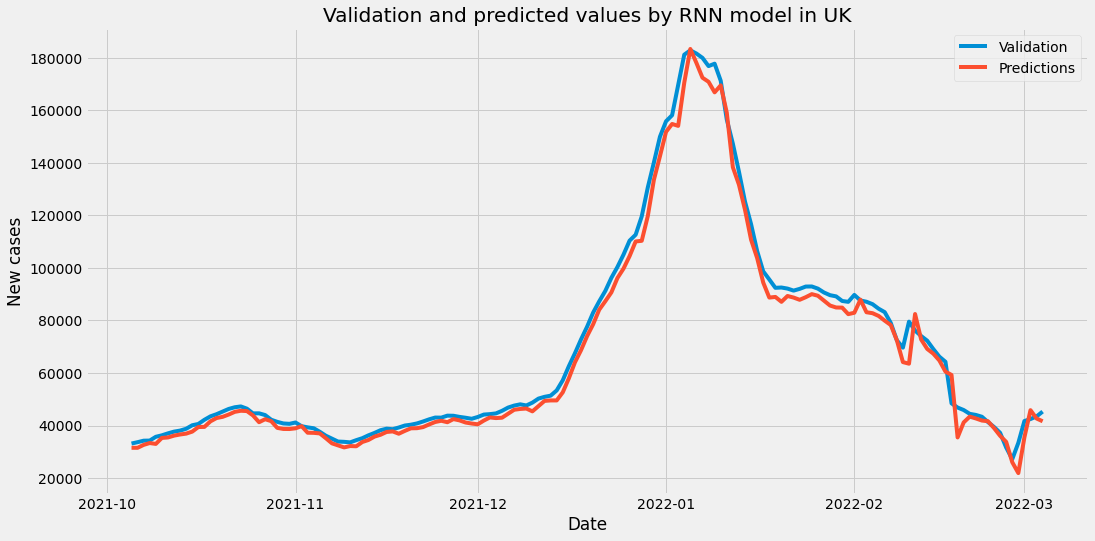

In [37]:
df_uk_cut,model_uk,valid_df_uk=build_model(df_uk[:-1],'UK')

- 이제 우리가 기다려온 것은 앞으로 10일 동안의 새로운 사례 수를 예측해 보세요.

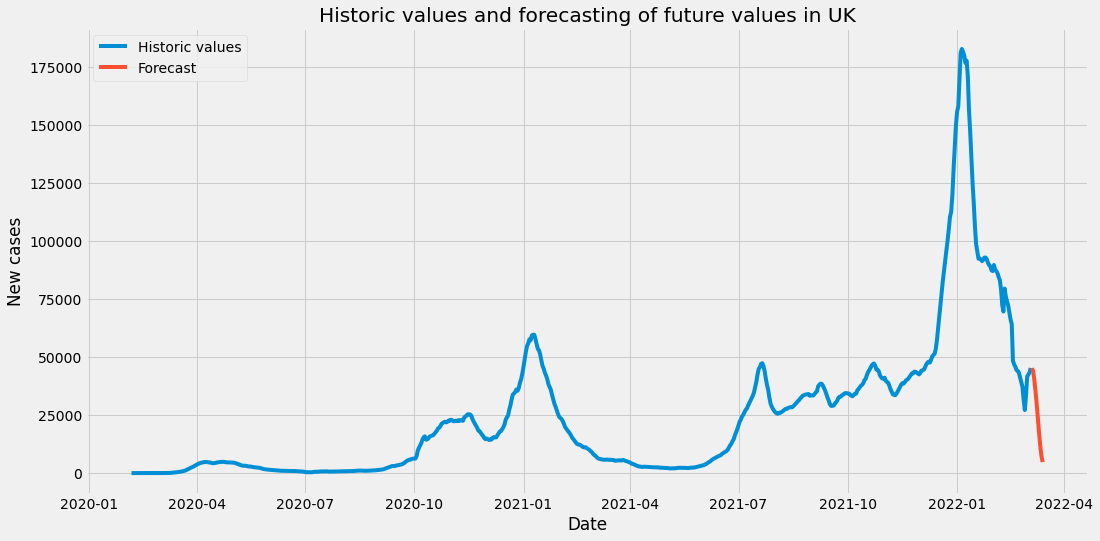

In [41]:
forecasting_uk=future_values(model_uk,df_uk_cut,10,'UK')

우리는 그 선이 계속해서 천천히 내려가고 아마도 다시 상승할 것이라는 것을 알 수 있는데, 이것은 원래의 오미크론 변종보다 훨씬 더 전염성이 강하다고 알려진 오미크론 BA.2 때문일 수 있다. 예측 일수는 늘릴 수 있지만, 오차를 이해하고 예측한 값을 취하기 때문에 더 멀리 갈수록 예측이 부정확해질 수 있다는 점을 감안해야 한다.

BA.2 계통에 대해 좀 더 알아봐 주시길 바라며, 심각도가 높을 경우 향후 몇 달 안에 새로운 검역으로 이어질 수 있습니다. 아직까지는 이 하위 변수가 더 심각한 질병이나 증상을 유발한다고 볼 만한 증거는 없지만, 아직은 말하기 이르다.

BA.2와 관련된 사례가 증가하고 있는 덴마크에서의 예비 연구에 따르면 이 이형변이는 지금까지 알려진 변종 중 가장 전염성이 강한 원래 오미크론 변종보다 더 전염성이 강할 수 있다. 덴마크 보건부 장관 마그누스 호이니케는 지난 1월 27일 BA.2 하위 변수가 현재 덴마크에서 지배적이라고 말했다.

In [42]:
forecasting_uk

2020-02-06        1.285714
2020-02-07        1.000000
2020-02-08        1.571429
2020-02-09        1.714286
2020-02-10        0.857143
                  ...     
2022-03-10    23520.708984
2022-03-11    17241.890625
2022-03-12    11696.359375
2022-03-13     7407.271484
2022-03-14     4731.218262
Length: 768, dtype: float64

#### 미국

RMSLE train set :  0.064
RMSLE validation set:  0.053


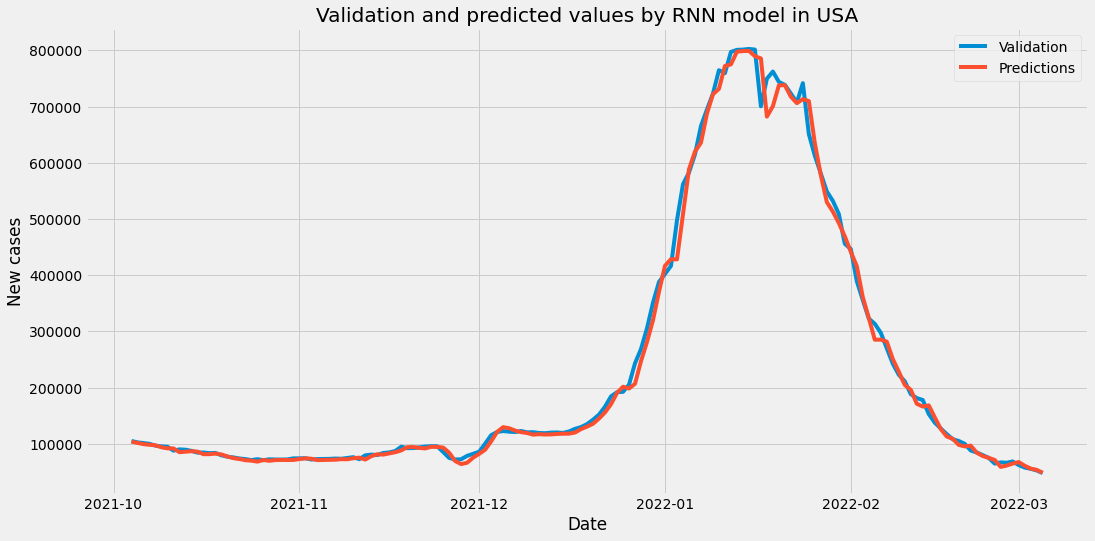

In [44]:
df_us_cut,model_us,valid_df_us=build_model(df_us,'USA')

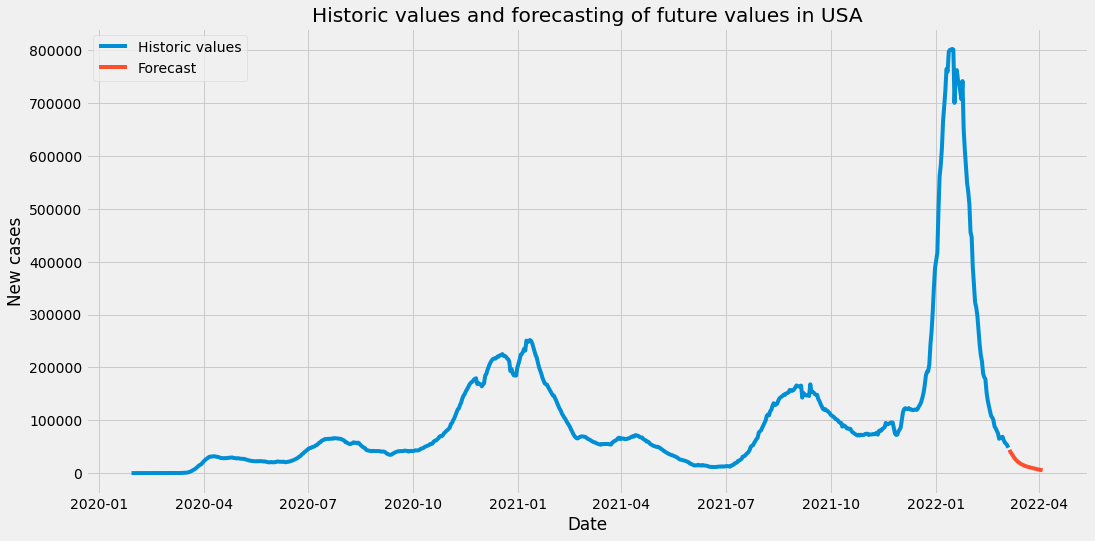

In [46]:
forecasting_us=future_values(model_us,df_us_cut,30,'USA')

미국이 1월 말 겪고 있는 복잡한 시나리오에도 불구하고 향후 몇 주 동안은 다소 완만한 하락세를 이어갈 것으로 예상할 수 있지만, 새로운 오미크론 서브타입으로 인해 상승 가능성을 주시해야 할 것이 분명하다.

#### 칠레

RMSLE train set :  0.057
RMSLE validation set:  0.046


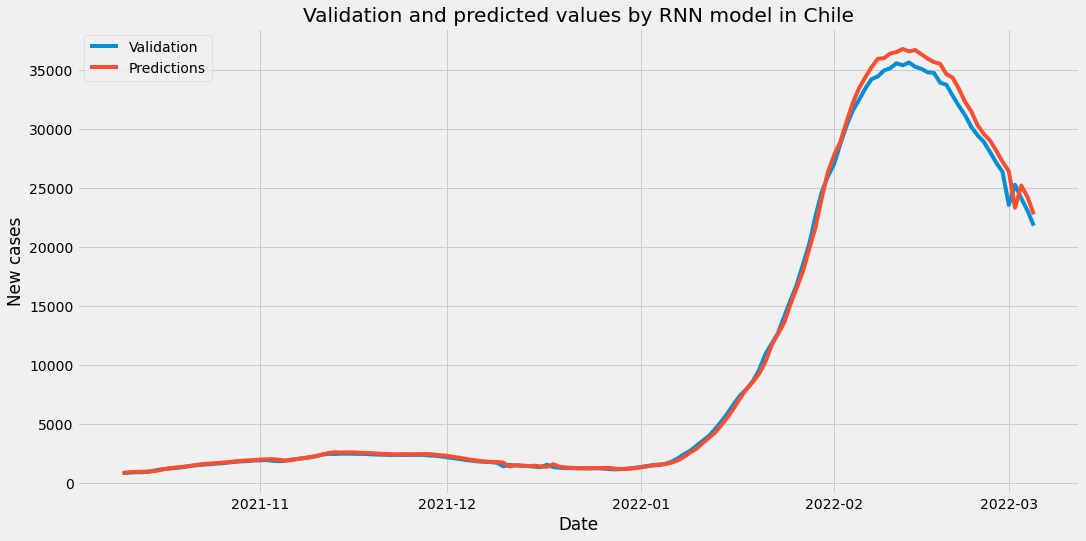

In [47]:
df_chile_cut,model_chile,valid_df_chile=build_model(df_chile,'Chile')

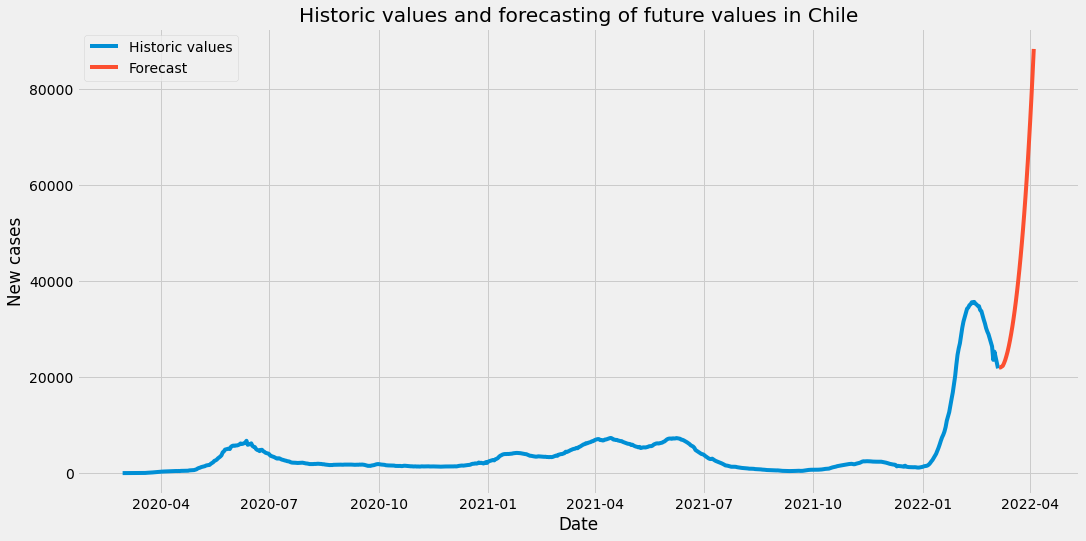

In [49]:
forecasting_chile = future_values(model_chile, df_chile_cut, 30, 'Chile')

우리가 지난 주에 예측했듯이 칠레는 오미크론의 정점을 지났고 지역 보고서들은 인구의 높은 예방접종률 때문에 이전 국가들에서 보았던 것처럼 그것이 감소할 것이라고 확신 할 수 있다는 것을 지지한다.

또 다른 흥미로운 분석은 오늘날 덴마크에서의 행동입니다. 덴마크는 유럽 국가 중 처음으로 제한을 벗어났습니다. 저는 여러분 모두가 어떻게 대유행병이 발생하는지 추적하기를 바랍니다. 이러한 나라에서 어떠한 제약 없이 어떤 일이 일어날지 알아보는 일종의 실험이 될 것입니다.

BBC 뉴스: 덴마크는 안면 마스크 착용을 포함한 국내 Covid-19 규제를 모두 해제하여 유럽 연합 국가로는 처음으로 이를 시행했다.

이 예측은 모델들이 예측한 그대로 현실에서 일어날 것이라고 결코 생각하지 않으며, 이것은 단지 하나의 변수에 기초하고 있으며, 앞서 말했듯이 경험과 경험적 근거는 당신이 여기서 본 것보다 더 많이 고려되어야 한다.

내가 하고 싶은 것은 정확히 이 모델을 "중환자 수"나 "감염된 의료/보건 직원의 수"와 같은 특징에 적용하는 것이다. 왜냐하면 이것들은 실제로 당국이 절대적으로 관심을 갖는 지표이기 때문이다. 왜냐하면 둘 다 증가한다는 것은 불행하게도 국가 전체의 보건 시스템에 재앙을 의미할 수 있기 때문이다.ta는 공개적으로 사용할 수 없습니다.

관심 있는 다른 기능에도 똑같이 적용하기를 바랍니다. 저는 매주 데이터 세트와 현재 프로젝트를 업데이트하여 우리 모두가 이러한 나라와 당신 나라들의 행동을 계속 추적할 수 있도록 할 것입니다! 이 주제에 관심이 있으시다면 이 작업의 새로운 버전으로 계속 업데이트해 주시기 바랍니다. 이 모델들이 완벽하게 작동하고 미래 예측가치가 우리 당국이 매일 부여하고 있는 가치와 일치한다는 것을 확인한다면 머신러닝의 새로운 시대가 열릴 것이라고 확신할 수 있다.